In [2]:
pip install sentence_transformers
pip install prince

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 20.2 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=24eae9ad21685053fae5cff5006bd933a8400255478a8f1e12391318829a8477
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence_transformers


In [18]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics.cluster import normalized_mutual_info_score, adjusted_rand_score
from sentence_transformers import SentenceTransformer
import numpy as np
from prince import PCA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [4]:
# import data
ng20 = fetch_20newsgroups(subset='test')
corpus = ng20.data[:2000]
labels = ng20.target[:2000]
k = len(set(labels))

In [13]:
# embedding
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
embeddings = model.encode(corpus)

.gitattributes:   0%|          | 0.00/690 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.69k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

In [67]:
df = pd.DataFrame(embeddings)
acp_model = PCA(n_components= k)
#acp_model

acp_model.fit(df)

#acp_model.eigenvalues_summary

df_acp = acp_model.transform(df)

df_acp.head()

component,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-3.758944,2.812586,0.239150,-0.920882,3.088474,4.159949,4.533283,1.650261,0.846388,-1.554951,-1.727399,0.373038,-1.166552,-1.506646,-1.017372,3.612982,-2.612601,2.381753,-2.479885,1.702110
1,-3.552206,-1.764419,0.174033,-3.145641,-0.129766,-5.017698,-1.492641,-5.113861,-2.157732,-1.136916,-2.129193,-0.359014,-1.192306,-0.669968,4.576926,1.865346,1.176187,2.126024,-0.949880,-0.436439
2,7.667501,-6.478566,-1.826173,0.527755,-2.892259,2.612511,1.607982,-1.723155,-0.462670,4.330111,-1.630735,-0.391647,2.147241,-1.038969,2.302925,-3.755291,0.057878,-0.206107,-2.188643,3.378462
3,8.521288,-4.074333,-0.613548,0.572674,0.328588,-4.059087,0.622590,0.979709,1.084478,-1.386147,2.510971,-1.169763,0.756723,0.079284,-1.528488,3.038755,3.643479,1.362212,-1.025445,2.119117
4,8.159485,-3.507665,-2.307062,-1.984860,-4.524743,-2.946808,3.068444,-5.409778,-1.479544,1.635748,2.318745,-0.153606,-0.033777,2.152805,1.837418,0.215619,0.591002,-0.994741,-1.173116,1.238378


In [78]:
series_from_df = df.values

series_from_df[:,:20]

array([[-0.57739973, -0.03035764, -0.10226078, ..., -0.07327487,
         0.14381264,  0.13451938],
       [-0.5476495 , -0.14716175, -0.10938036, ..., -0.5399554 ,
         0.280371  ,  0.05286885],
       [ 0.00645862,  0.16189742, -0.22414456, ..., -0.3142731 ,
         0.2659923 ,  0.35225356],
       ...,
       [-0.23235744,  0.01727576, -0.21409526, ..., -0.13685955,
         0.07093768,  0.30723643],
       [-0.35668218,  0.09248009, -0.26561555, ...,  0.30681586,
        -0.16171125, -0.24449843],
       [-0.3964293 , -0.1438613 , -0.07510003, ..., -0.00716794,
         0.09755991, -0.02394975]], dtype=float32)

In [39]:
chart = acp_model.plot(df)

chart

alt.LayerChart(...)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

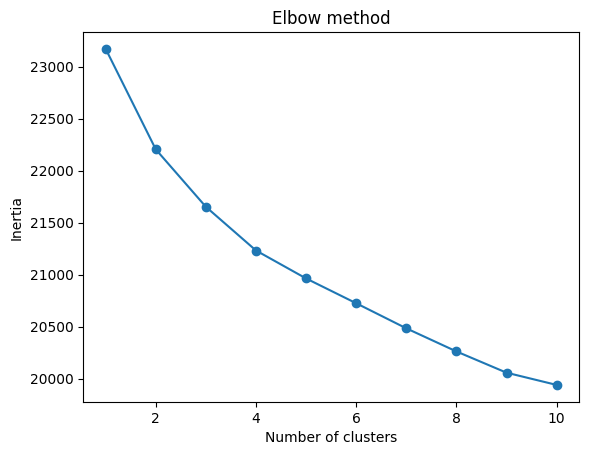

In [50]:

inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, max_iter=300)
    kmeans.fit(df)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [81]:
def dim_red(mat, p):


    '''
    Perform dimensionality reduction

    Input:
    -----
        mat : NxM list
        p : number of dimensions to keep
    Output:
    ------
        red_mat : NxP list such that p<<m
    '''

    df = pd.DataFrame(mat)
    acp_model = PCA(n_components= p)

    acp_model.fit(df)

    df_acp = acp_model.transform(df).values

    red_mat = df_acp[:,:p]

    chart = acp_model.plot(df)

    return red_mat

In [55]:
def clust(mat, k):
    '''
    Perform clustering

    Input:
    -----
        mat : input list
        k : number of cluster
    Output:
    ------
        pred : list of predicted labels
    '''
    df = pd.DataFrame(mat)

    inertias = []

    for i in range(1,11):
      kmeans = KMeans(n_clusters=i)
      kmeans.fit(df)
      inertias.append(kmeans.inertia_)

    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    pred = kmeans.labels_

#    pred = np.random.randint(k, size=len(corpus))

    return pred

In [83]:
# import data
ng20 = fetch_20newsgroups(subset='test')
corpus = ng20.data[:2000]
labels = ng20.target[:2000]
k = len(set(labels))

# embedding
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
embeddings = model.encode(corpus)

# perform dimentionality reduction
red_emb = dim_red(embeddings, 20)

# perform clustering
pred = clust(red_emb, k)

# evaluate clustering results
nmi_score = normalized_mutual_info_score(pred,labels)
ari_score = adjusted_rand_score(pred,labels)

print(f'NMI: {nmi_score:.2f} \nARI: {ari_score:.2f}')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

NMI: 0.42 
ARI: 0.25
